In [14]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
datasets = ["SDY67", "Monaco I", "Monaco II", "GSE65133", "GSE107572", "GSE120502"]
methods = ["MuSiC", "CibersortX", "Scaden", "TAPE-O", "TAPE-A", "Linear MLPs", "BayesPrism", "BayesPrism-M", "DISSECT"]

In [16]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [17]:
sns.set(style="whitegrid", font_scale=1.2)
color_palette = {'MuSiC': '#0173b2',
                 'CibersortX': '#de8f05',
                 'Scaden': '#029e73',
                 'TAPE-O': '#d55e00',
                 'TAPE-A': '#cc78bc',
                 'Linear MLPs': '#ca9161',
                 'BayesPrism': '#ece133',
                 'BayesPrism-M': '#949494',
                 'DISSECT': '#fbafe4'} # same colors as in main

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


# S1A

In [19]:
# compute rmse for each dataset-method pair
df = pd.DataFrame(index=datasets, columns=methods)
for dataset in datasets:
    gt = pd.read_table(os.path.join(datadir, f"gt_{dataset}.txt"), index_col=0)
    celltypes = [col for col in gt.columns if col!="Unknown"]
    gt = gt.div(gt.sum(1), 0)
    for method in methods:
        if "Linear" not in method: # ignore linear method as it doesn't sum to 1
            tmp = pd.read_table(os.path.join(datadir, f"{method}_{dataset}.txt"), index_col=0)
        tmp = tmp[gt.columns]
        tmp = tmp.div(tmp.sum(1), 0)
        x, y = np.array(gt).reshape(-1), np.array(tmp).reshape(-1)
        df.loc[dataset, method] = mean_squared_error(x, y, squared=False)

In [20]:
df = df.reset_index()

In [21]:
df = df.melt(id_vars="index")
df.rename(columns={"index": "Dataset", "variable": "Method", "value": "rmse"},
         inplace=True)

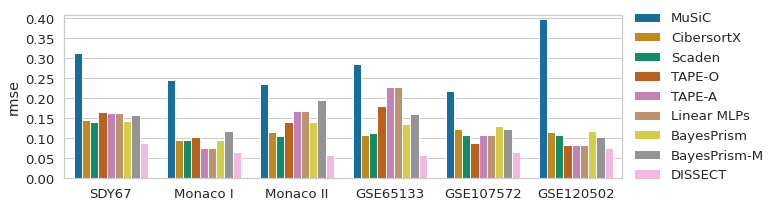

In [22]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, hue="Method", x="Dataset", y="rmse", palette=color_palette)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$rmse$")
plt.ylabel("rmse")
plt.ylim(0,df.rmse.max()+0.01)
plt.yticks(np.arange(0,df.rmse.max()+0.01,0.05))
plt.xlabel("")
plt.savefig(os.path.join(savedir, "S1A_overall_rmse.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S1A_overall_rmse.png"), bbox_inches="tight", dpi=300)


# S1B

In [23]:
# compute r for each dataset-method pair
df = pd.DataFrame(index=datasets, columns=methods)
for dataset in datasets:
    gt = pd.read_table(os.path.join(datadir, f"gt_{dataset}.txt"), index_col=0)
    celltypes = [col for col in gt.columns if col!="Unknown"]
    gt = gt.div(gt.sum(1), 0)
    for method in methods:
        tmp = pd.read_table(os.path.join(datadir, f"{method}_{dataset}.txt"), index_col=0)
        tmp = tmp[gt.columns]
        tmp = tmp.div(tmp.sum(1), 0)
        x, y = np.array(gt).reshape(-1), np.array(tmp).reshape(-1)
        df.loc[dataset, method] = np.corrcoef(x, y)[0,1]

In [24]:
df = df.reset_index()

In [25]:
df = df.melt(id_vars="index")
df.rename(columns={"index": "Dataset", "variable": "Method", "value": "r"},
         inplace=True)

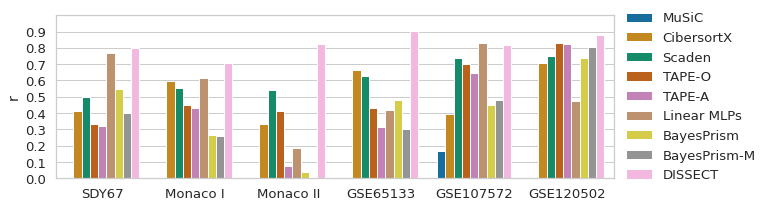

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, hue="Method", x="Dataset", y="r", palette=color_palette)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$r$")
plt.ylabel("r")

plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.xlabel("")
plt.savefig(os.path.join(savedir, "S1B_overall_r.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S1B_overall_r.png"), bbox_inches="tight", dpi=300)